# Subject level windowed mean analysis

This notebook demonstrates a simple analysis of epoched EEG data. It introduces the concept of a windowed mean, where two conditions are compared by taking the mean of the signal in a certain time window in relevant sensors and comparing the means. This includes some basic plotting and statistical testing using t-tests.

In [41]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import mne

## Loading the data
First, we load in preprocessed EEG data from a single subject.

In [51]:
# load in the data
data_path = Path("/Users/lina/Documents/GitHub/ore_EEG/epochs")
epochs = mne.read_epochs(data_path / f"epochs_own_sub1-epo.fif", verbose=False, preload=True)
# load in second data
epochs2 = mne.read_epochs(data_path / f"epochs_own2_ah-epo.fif", verbose=False, preload=True)

# only keep eeg channels
epochs.pick(["eeg"])
epochs2.pick(["eeg"])

Number of events,900
Events,happy/asian: 42happy/black: 66happy/white: 56happycorrect/response: 157incorrect: 17neutral/black: 66neutral/response: 120neutral/white: 54sad/asian: 42sad/black: 68sad/white: 56sadcorrect/response: 156
Time range,-0.100 – 0.800 s
Baseline,-0.100 – 0.000 s


# Epochs from individual subjects

In [55]:
# extract the general ones
epochs_white = epochs['happy/black', 'neutral/black', 'sad/black', 'happy/asian', 'sad/asian']
epochs_other = epochs['happy/white', 'neutral/white', 'sad/white']
epochs_black = epochs['happy/black', 'sad/black', 'neutral/black']
epochs_asian = epochs['happy/asian', 'sad/asian']

# individual epochs, choose what we are exactly intersted in
epochs_nw = epochs['neutral/white']
epochs_nb = epochs['neutral/black']
epochs_sw = epochs['sad/white']
epochs_sb = epochs['sad/black']
epochs_sa = epochs['sad/asian']
epochs_hw = epochs['happy/white']
epochs_hb = epochs['happy/black']
epochs_ha= epochs['happy/asian']

## SECOND SUBJECT
# extract the general ones
epochs2_white = epochs2['happy/black', 'neutral/black', 'sad/black', 'happy/asian', 'sad/asian']
epochs2_other = epochs2['happy/white', 'neutral/white', 'sad/white']
epochs2_black = epochs2['happy/black', 'sad/black', 'neutral/black']
epochs2_asian = epochs2['happy/asian', 'sad/asian']

# individual epochs, choose what we are exactly intersted in
epochs2_nw = epochs2['neutral/white']
epochs2_nb = epochs2['neutral/black']
epochs2_sw = epochs2['sad/white']
epochs2_sb = epochs2['sad/black']
epochs2_sa = epochs2['sad/asian']
epochs2_hw = epochs2['happy/white']
epochs2_hb = epochs2['happy/black']
epochs2_ha= epochs2['happy/asian']


Now we have our two conditions: Correct and incorrect button presses. One of the simplest way in which we can determine whether the signal in our two conditions are statistically significant is by:

1. Segmenting our data to channels and a time window chosen a priori.

2. Taking the mean of that window time window across channels.

3. Running statistical tests on the windowed means from the two conditions.

In an experiment with multiple participants we would also average over trials from individual participants, in order to only have one data point per participant (and thereby avoid multiple comparisons). However, since we have one participant (for now), we can keep one dimension of the individual data, i.e. the trials.

If you are conducting a windowed mean analysis, you should rely on previous literature to determine which channels and time windows to use. 

**Note:** The time window and channels used in this example are arbitrarily chosen for the purpose of demonstrating how to calculate the windowed mean and run a statistical test on it.

### Preparing the data for t-test
The aim is to conduct a t-test on the averaged data, to establish whether the means of the two conditions (correct and incorrect) are different.

We can use the `get_data()` function to get the numerical values of the signal for the t-test. tmin and tmax are used to define the time window, and the picks are the channels that we expect to see an effect in.

In [52]:
channel_names = epochs_other.ch_names
print(channel_names)

['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2']


In [56]:
# ROIs are P7, PO7, PO8, TP9, P8, and TP10 (Blau et al., 2007).
# chosen channels
picks = [ "P7", "Oz", "TP10", "TP9"]


# time window in seconds, here we choose the one for n170
tmin = 0.130
tmax = 0.210

In [57]:
# Data
# FIRST
data_white = epochs_white.get_data(picks=picks, tmin=tmin, tmax=tmax)
data_other = epochs_other.get_data(picks=picks, tmin=tmin, tmax=tmax)
data_black = epochs_black.get_data(picks=picks, tmin=tmin, tmax=tmax)
data_asian = epochs_asian.get_data(picks=picks, tmin=tmin, tmax=tmax)
# SECOND
data2_white = epochs2_white.get_data(picks=picks, tmin=tmin, tmax=tmax)
data2_other = epochs2_other.get_data(picks=picks, tmin=tmin, tmax=tmax)
data2_black = epochs2_black.get_data(picks=picks, tmin=tmin, tmax=tmax)
data2_asian = epochs2_asian.get_data(picks=picks, tmin=tmin, tmax=tmax)


# Extracting specific data we are interested in
# FIRST SUBJECT
data_sw = epochs_sw.get_data(picks=picks, tmin=tmin, tmax=tmax)
data_sb = epochs_sb.get_data(picks=picks, tmin=tmin, tmax=tmax)
data_sa = epochs_sa.get_data(picks=picks, tmin=tmin, tmax=tmax)
data_hw = epochs_hw.get_data(picks=picks, tmin=tmin, tmax=tmax)
data_hb = epochs_hb.get_data(picks=picks, tmin=tmin, tmax=tmax)
data_ha = epochs_ha.get_data(picks=picks, tmin=tmin, tmax=tmax)

# SECOND SUBJECT
data2_sw = epochs2_sw.get_data(picks=picks, tmin=tmin, tmax=tmax)
data2_sb = epochs2_sb.get_data(picks=picks, tmin=tmin, tmax=tmax)
data2_sa = epochs2_sa.get_data(picks=picks, tmin=tmin, tmax=tmax)
data2_hw = epochs2_hw.get_data(picks=picks, tmin=tmin, tmax=tmax)
data2_hb = epochs2_hb.get_data(picks=picks, tmin=tmin, tmax=tmax)
data2_ha = epochs2_ha.get_data(picks=picks, tmin=tmin, tmax=tmax)

Investigating the resulting data; how many dimensions does the data have? What do you think they represent (i.e. which dimension is channels, trials, etc.)? Is there a difference in the number of trials between the two conditions?

Now we can average over the time window and channels to get one data point per trial. We can use the `np.mean()` function to do this, and specify the axis over which to average. 

In [59]:
# for general comaprison between white and general
data_other_mean = np.mean(data_other, axis=(1,2)) # averaging over the second and third dimension of the data (channels and time)
data_white_mean = np.mean(data_white, axis=(1,2)) 

# comparing it specifically between two ethnicities and emotions 
data_hw_mean = np.mean(data_hw, axis=(1,2))
data_hb_mean = np.mean(data_hb, axis=(1,2))


### Running the t-test
Now that we have one numerical value per trial, we can compare the means of the two conditions using a t-test. We can use the `scipy.stats.ttest_ind()` function to do this.

In [49]:
from scipy import stats

In [62]:
stats.ttest_ind(data_white_mean, data_other_mean)

Ttest_indResult(statistic=0.8925244655891422, pvalue=0.3725910348249537)

In [63]:
stats.ttest_ind(data_hw_mean, data_hb_mean)

Ttest_indResult(statistic=-0.34873904099905034, pvalue=0.7279014898043176)

### Plotting
Now lets create a plot of the time courses averaged over time and channels, where we also plot the time window that we used for the t-test.

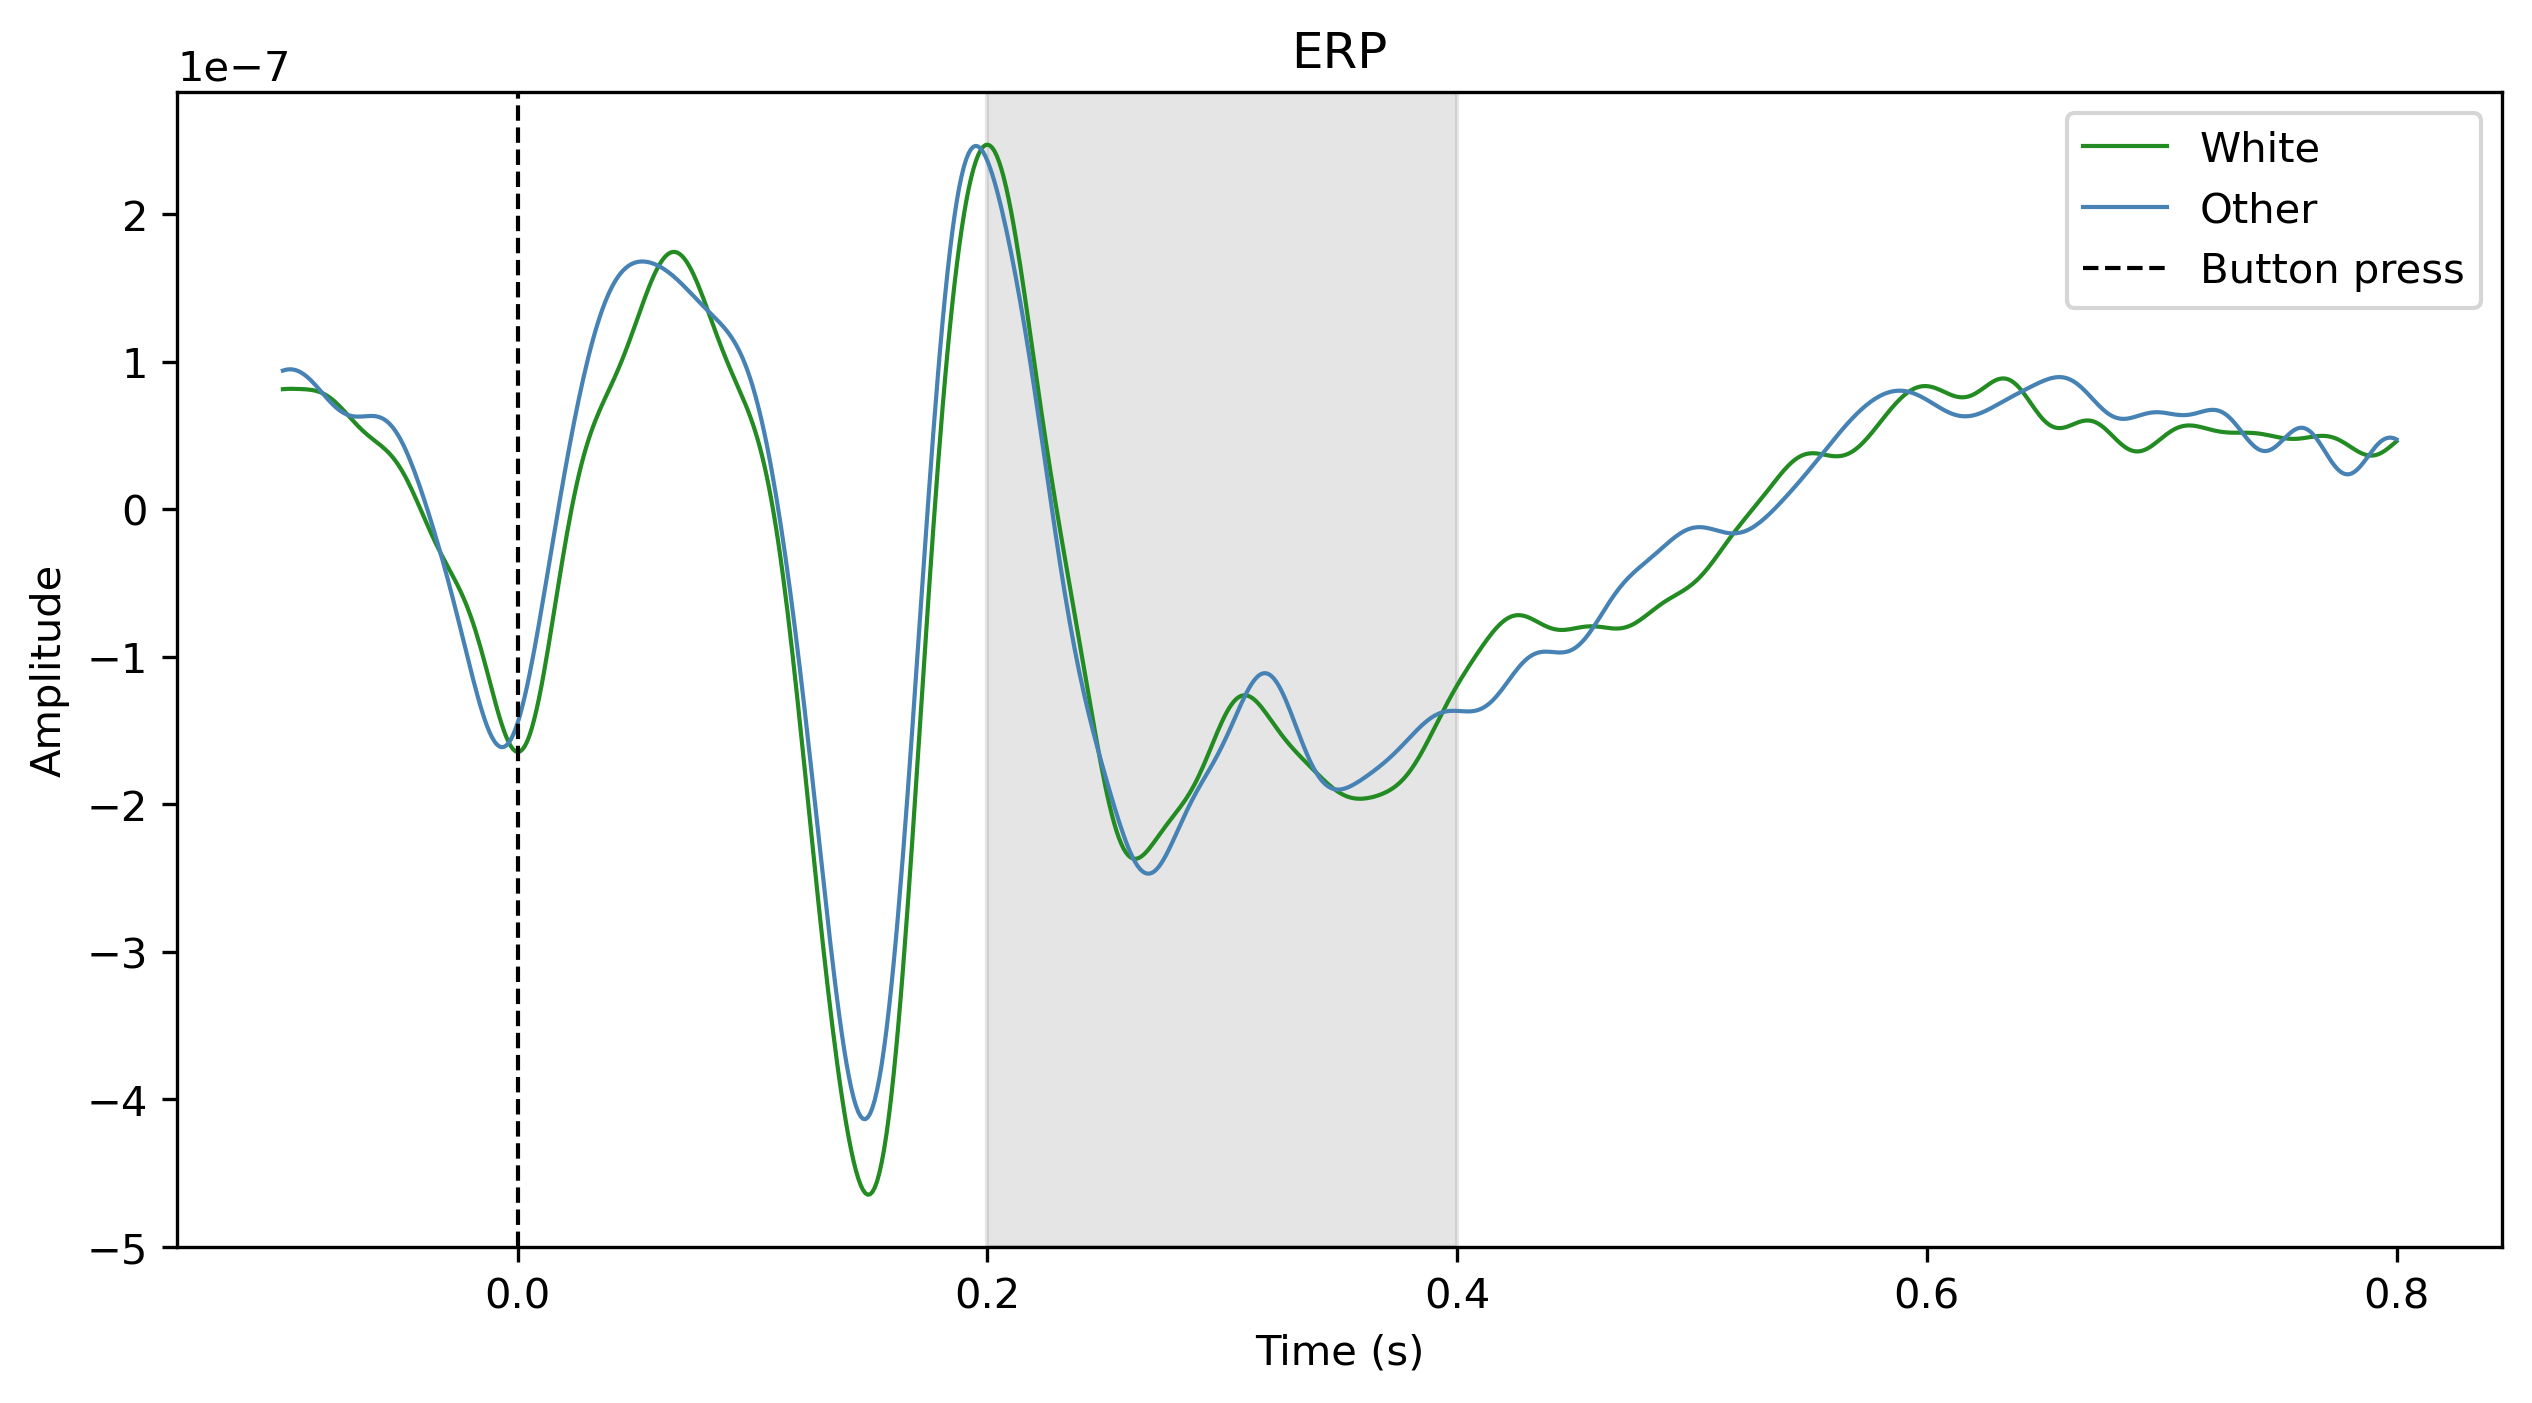

In [ ]:
plot_data_white = epochs_white.get_data(copy = True).mean(axis=(0, 1)) # mean over channels and trials 
plot_data_other = epochs_other.get_data(copy = True).mean(axis=(0, 1)) # mean over channels and trials 

times = epochs_white.times
fig, ax = plt.subplots(1, figsize=(10, 5), dpi=300)

# plot the time window
ax.axvspan(tmin, tmax, color="grey", alpha=0.2)

# plot the time course
ax.plot(times, plot_data_white.T, label="White", linewidth=1, color="forestgreen")
ax.plot(times, plot_data_other.T, label="Other", linewidth=1, color="steelblue")

# vertical line at 0
ax.axvline(x=0, color="black", linestyle="--", label = "Button press", linewidth=1)

ax.set(xlabel="Time (s)", ylabel="Amplitude", title="ERP")
ax.legend(loc = "upper right")

### Also plot happy emotion by white and black faces

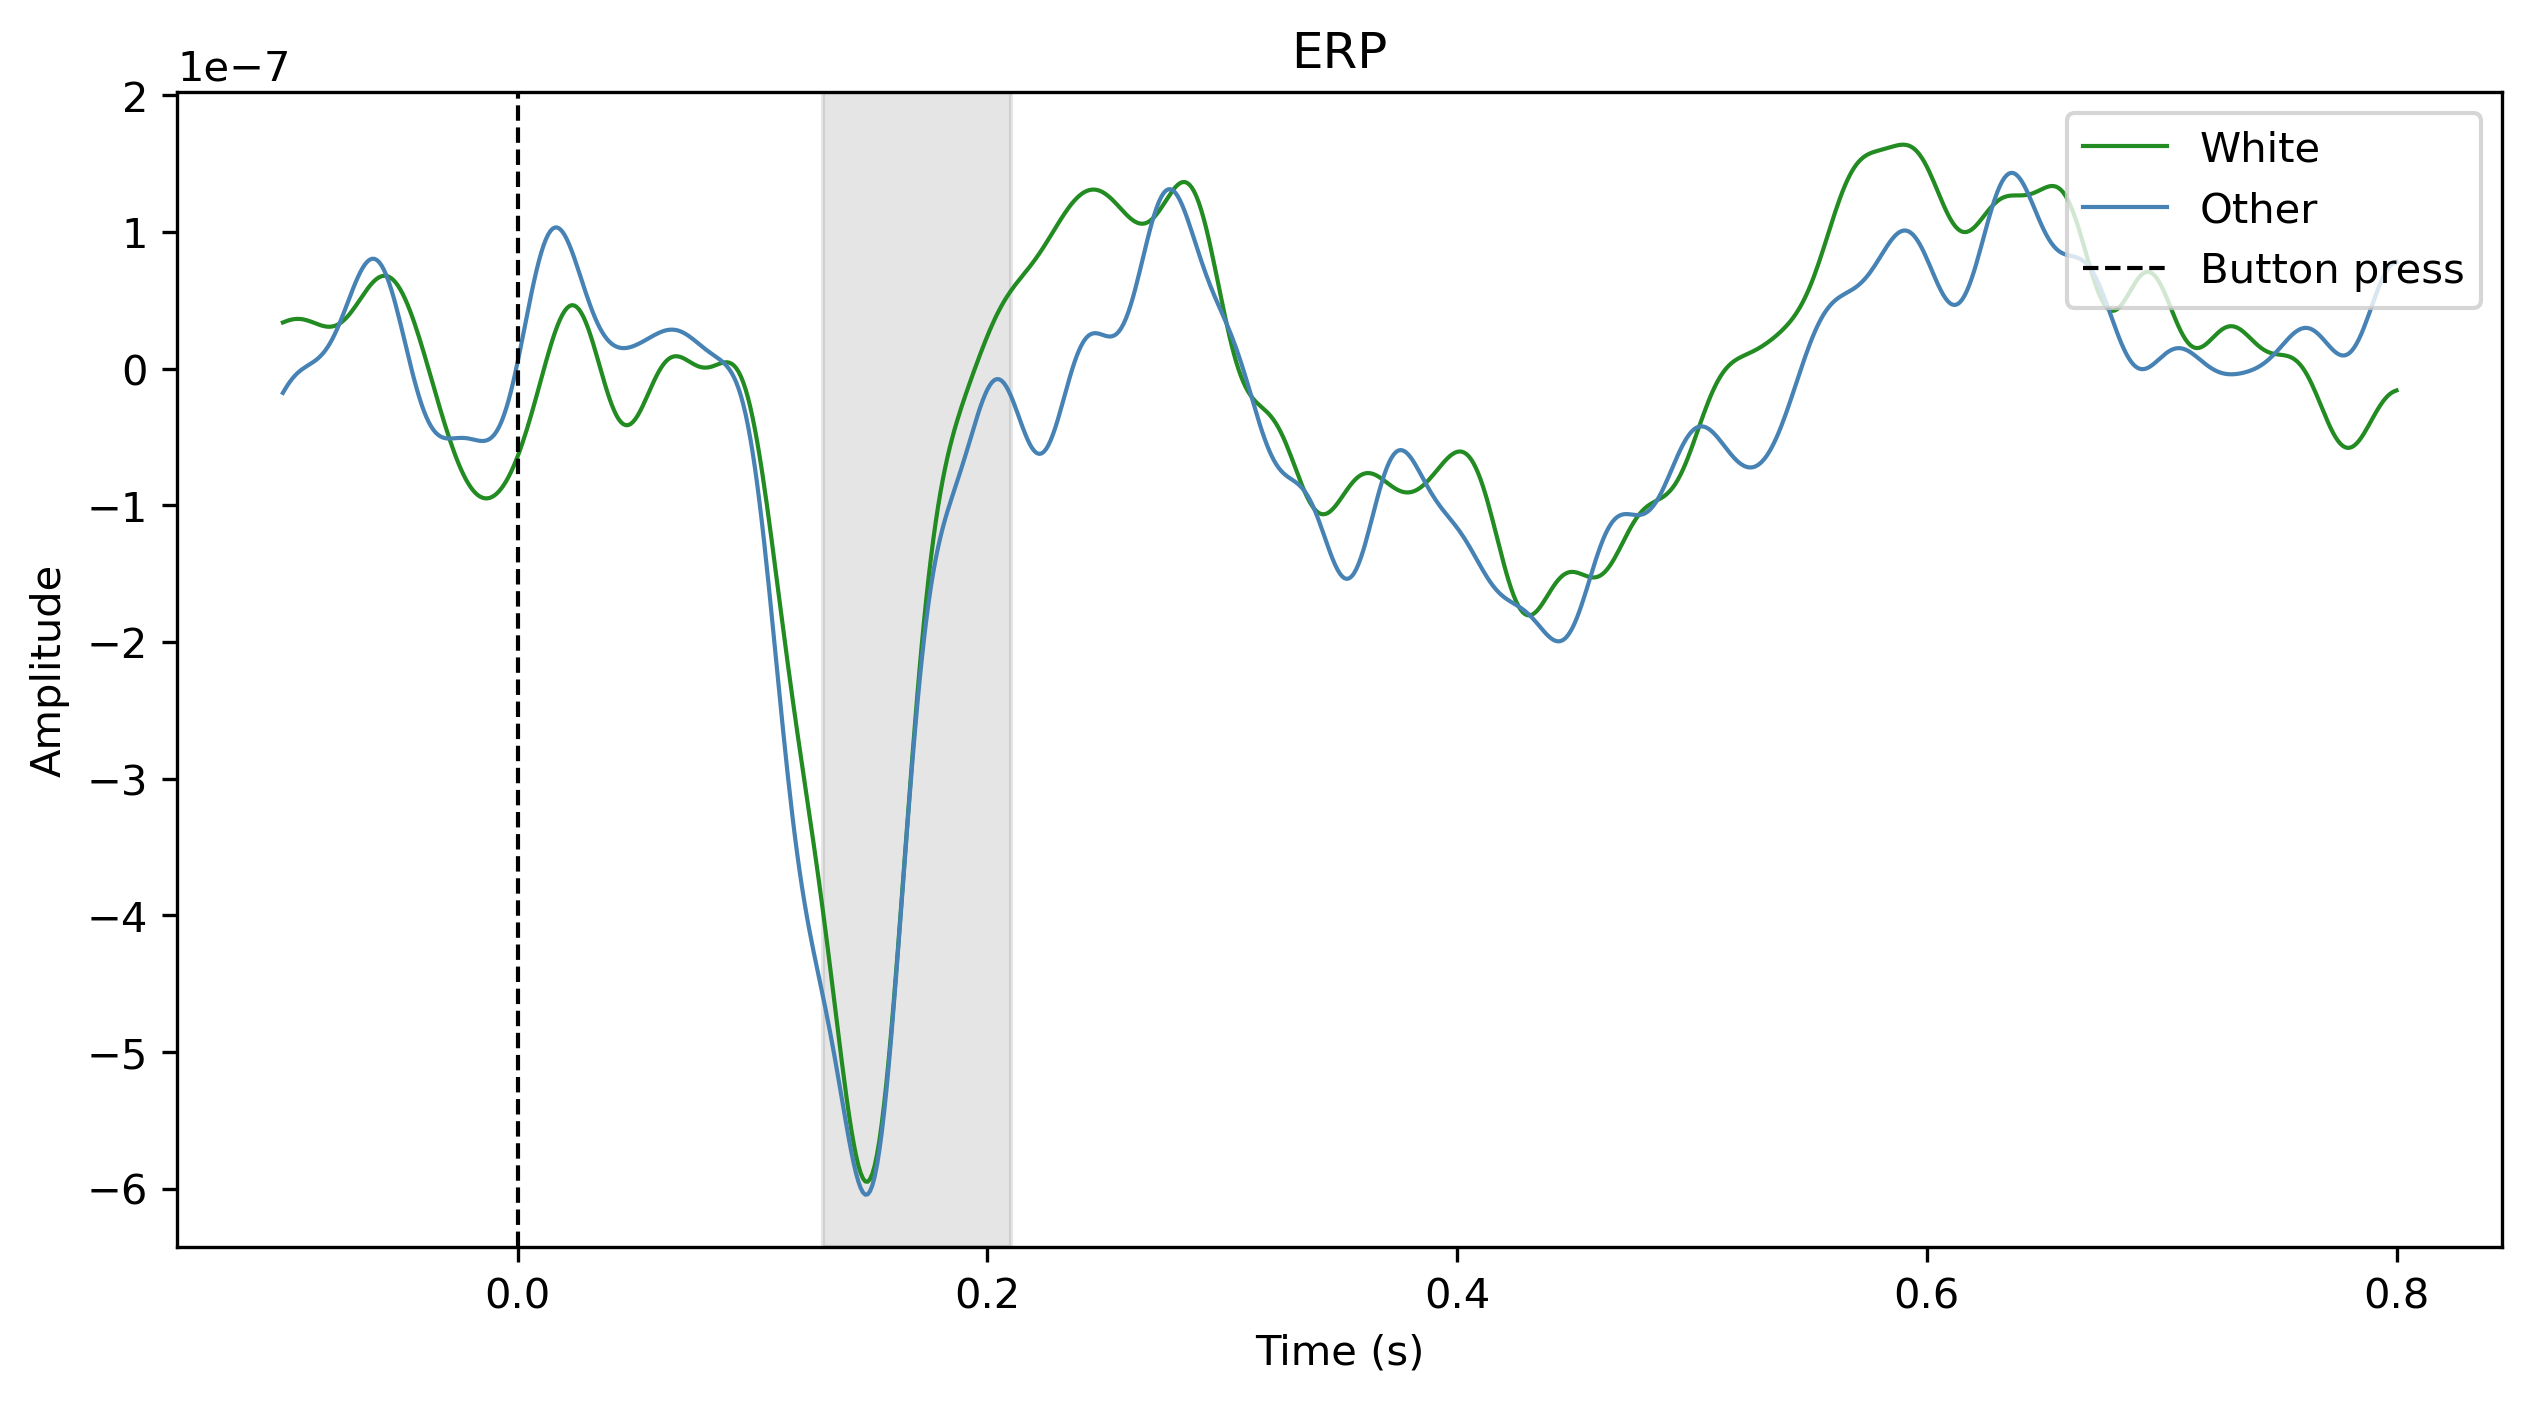

In [64]:

plot_data_hw = epochs_hw.get_data(copy = True).mean(axis=(0, 1)) # mean over channels and trials 
plot_data_hb = epochs_hb.get_data(copy = True).mean(axis=(0, 1)) # mean over channels and trials 

times = epochs_hb.times
fig, ax = plt.subplots(1, figsize=(10, 5), dpi=300)

# plot the time window
ax.axvspan(tmin, tmax, color="grey", alpha=0.2)

# plot the time course
ax.plot(times, plot_data_hw.T, label="White", linewidth=1, color="forestgreen")
ax.plot(times, plot_data_hb.T, label="Other", linewidth=1, color="steelblue")

# vertical line at 0
ax.axvline(x=0, color="black", linestyle="--", label = "Button press", linewidth=1)

ax.set(xlabel="Time (s)", ylabel="Amplitude", title="ERP")
ax.legend(loc = "upper right")